In [1]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.preprocessing import StandardScaler
# Import the function
sys.path.append(os.path.abspath('../src/data'))
#from extract_for_model_new import extract_time_series
#from extract_for_model_new import scale_time_series_all
#from extract_for_model_choosen_shift import extract_time_series_choosen_shift
%matplotlib inline

In [2]:
import pandas as pd
dataset1= pd.read_csv('/home/reference/pivate_public_file.csv')
print(dataset1.head())

   Unnamed: 0      company    year quarter   IQ_EBIT  IQ_TOTAL_OTHER_OPER  \
0           0  IQ102267046  2013.0      Q4  0.088781             1.544846   
1           1  IQ102267046  2014.0      Q4  0.161020             2.177063   
2           2  IQ102267046  2015.0      Q4  0.018564             3.163827   
3           3  IQ105654219  2007.0      Q4 -0.058002             1.405880   
4           4  IQ105654219  2012.0      Q4  0.417684             1.918909   

   IQ_OPER_INC  IQ_TOTAL_REV     TARGET     IQ_AR     IQ_RE  IQ_TOTAL_ASSETS  \
0     0.088781      2.962316   4.305274  2.467916 -0.220824         3.479154   
1     0.161020      4.305274   6.537584  3.671694  0.081069         4.908565   
2     0.018564      6.537584  12.468611  5.159870  0.107997         6.973966   
3    -0.058002      2.912760   4.642862  0.736371 -0.161029         1.867177   
4     0.417684      4.642862   4.957326  1.114145  0.935905         3.141921   

   IQ_PRIV  IQ_PUB  
0        1       0  
1        1    

In [3]:
dataset1 = dataset1.drop('Unnamed: 0',axis=1)

In [4]:
dataset1.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB
0,IQ102267046,2013.0,Q4,0.088781,1.544846,0.088781,2.962316,4.305274,2.467916,-0.220824,3.479154,1,0
1,IQ102267046,2014.0,Q4,0.161020,2.177063,0.161020,4.305274,6.537584,3.671694,0.081069,4.908565,1,0
2,IQ102267046,2015.0,Q4,0.018564,3.163827,0.018564,6.537584,12.468611,5.159870,0.107997,6.973966,1,0
3,IQ105654219,2007.0,Q4,-0.058002,1.405880,-0.058002,2.912760,4.642862,0.736371,-0.161029,1.867177,1,0
4,IQ105654219,2012.0,Q4,0.417684,1.918909,0.417684,4.642862,4.957326,1.114145,0.935905,3.141921,1,0


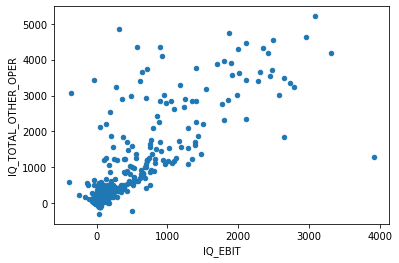

In [5]:
dataset1.plot(kind='scatter',x='IQ_EBIT', y='IQ_TOTAL_OTHER_OPER')

In [6]:
scaler = StandardScaler()

In [7]:
dataset = dataset1.copy()
col_names = ['IQ_OPER_INC', 'IQ_EBIT','IQ_TOTAL_OTHER_OPER','IQ_TOTAL_REV','TARGET','IQ_AR','IQ_RE','IQ_TOTAL_ASSETS']
features = dataset[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
dataset[col_names] = features
print(dataset)

          company    year quarter   IQ_EBIT  IQ_TOTAL_OTHER_OPER  IQ_OPER_INC  \
0     IQ102267046  2013.0      Q4 -0.132574            -0.159024    -0.132574   
1     IQ102267046  2014.0      Q4 -0.132130            -0.156910    -0.132130   
2     IQ102267046  2015.0      Q4 -0.133006            -0.153610    -0.133006   
3     IQ105654219  2007.0      Q4 -0.133478            -0.159489    -0.133478   
4     IQ105654219  2012.0      Q4 -0.130551            -0.157773    -0.130551   
...           ...     ...     ...       ...                  ...          ...   
9458    IQ9817151  2017.0      Q4  0.430714             0.019553     0.430714   
9459    IQ9950803  2017.0      Q4 -0.132640            -0.163635    -0.132640   
9460   IQ99552165  2017.0      Q4 -0.088098            -0.120880    -0.088098   
9461   IQ99715630  2017.0      Q4 -0.138595            -0.149694    -0.138595   
9462     IQ997213  2017.0      Q4 -0.044490             0.191511    -0.044490   

      IQ_TOTAL_REV    TARGE

In [8]:
inertia = [] # List of the inertia score for each cluster and plot the elbow curve(a measure of how internally coherent clusters are.)
sil = [] # List the silhouette score
    

X = dataset.loc[:,'IQ_EBIT':'IQ_TOTAL_ASSETS']
for i in range(2,11):
    #plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    
    y_pred = KMeans(n_clusters=i, init = 'random', random_state = 2)
    y_pred.fit(X)
    cluster_label = y_pred.predict(X)
    inertia.append([i,y_pred.inertia_])
    sil.append((i, silhouette_score(X, cluster_label)))
    #print(type(cluster_label))from sklearn.metrics import silhouette_samples, silhouette_score

Text(0.5, 1.0, 'Silhouetter Score Curve')

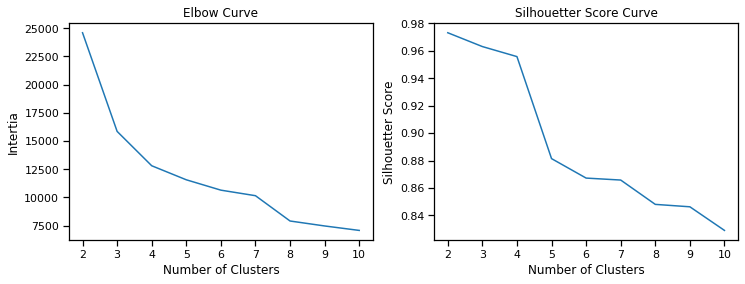

In [9]:
sns.set_context("notebook")
fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [10]:
# We retain 3 clusters due to inertia and the silhouette curve
n_former_cluster = 4
y_pred = KMeans(n_clusters=4, init = 'random', random_state = 7)
y_pred.fit(X)
cluster_label = y_pred.predict(X)

In [11]:
for i in range(4):
    print(i,len(cluster_label[cluster_label==i]))

0 50
1 9289
2 97
3 27


In [12]:
clusters  = pd.Series(y_pred.labels_)
dataset = dataset.assign(centroids=clusters.values)

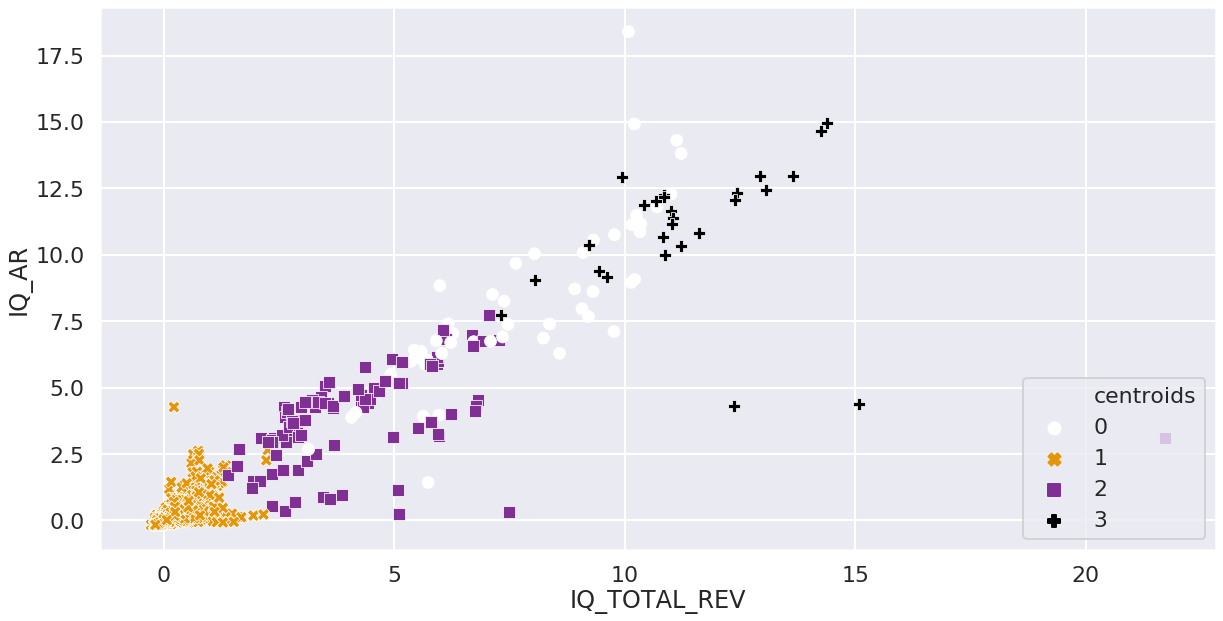

In [13]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_TOTAL_REV", y="IQ_AR", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = dataset)

# Provide a dictionary to the palette argument
#ax = sns.scatterplot( x="IQ_EBIT", y="IQ_TOTAL_REV", data=dataset_choosen, fit_reg=False , hue = "centroids" , legend=False, palette=dict(0="#9b59b6", 1="#3498db", 2="#95a5a6" 3 = "#96a5B6"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

In [14]:
datasetc = dataset[dataset['centroids']==1]

In [15]:
datasetc = datasetc.copy()
col_names = ['IQ_OPER_INC', 'IQ_EBIT','IQ_TOTAL_OTHER_OPER','IQ_TOTAL_REV','TARGET','IQ_AR','IQ_RE','IQ_TOTAL_ASSETS']
features = datasetc[col_names]
#scaler = StandardScaler().fit(features.values)
features = scaler.inverse_transform(features.values)
datasetc[col_names] = features

In [16]:
datasetc.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,TARGET,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB,centroids
0,IQ102267046,2013.0,Q4,0.088781,1.544846,0.088781,2.962316,4.305274,2.467916,-0.220824,3.479154,1,0,1
1,IQ102267046,2014.0,Q4,0.161020,2.177063,0.161020,4.305274,6.537584,3.671694,0.081069,4.908565,1,0,1
2,IQ102267046,2015.0,Q4,0.018564,3.163827,0.018564,6.537584,12.468611,5.159870,0.107997,6.973966,1,0,1
3,IQ105654219,2007.0,Q4,-0.058002,1.405880,-0.058002,2.912760,4.642862,0.736371,-0.161029,1.867177,1,0,1
4,IQ105654219,2012.0,Q4,0.417684,1.918909,0.417684,4.642862,4.957326,1.114145,0.935905,3.141921,1,0,1


In [17]:
datasetc.to_csv(r'pivate_public_filecluter1notscaled.csv')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics

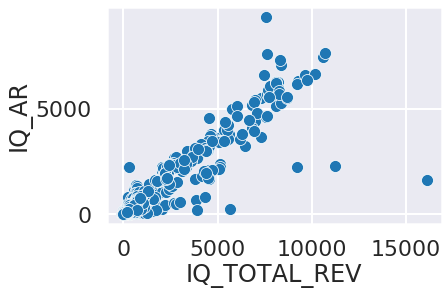

In [19]:
sns.scatterplot(x = dataset1['IQ_TOTAL_REV'],y = dataset1['IQ_AR'], data = dataset1)

In [20]:
y = datasetc.loc[:,"TARGET"]
X  = datasetc.loc[:,"IQ_EBIT":"IQ_TOTAL_ASSETS"].drop("TARGET",axis = 1)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()




X_train,X_test = train_test_split(datasetc,test_size=0.2)

In [21]:
# Drop the scaling of Target
y_train = X_train['TARGET']
y_test = X_test['TARGET']
X_train.drop('TARGET',axis=1,inplace = True)
X_test.drop('TARGET',axis=1, inplace = True)

/home/perihan_balat86/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
#Drop Target and scale the train and test set
X_train_scale = scaler_X.fit_transform(X_train.loc[:,"IQ_EBIT":"IQ_TOTAL_ASSETS"])
X_test_scale = scaler_X.transform(X_test.loc[:,"IQ_EBIT":"IQ_TOTAL_ASSETS"])

X_train_scale = pd.DataFrame(X_train_scale)
X_train_scale.columns = X_train.columns[3:10]
X_test_scale = pd.DataFrame(X_test_scale)
X_test_scale.columns = X_test.columns[3:10]
#print(X_train_scale)
X_train_scale.insert(0,'company',X_train['company'].values,True)
X_train_scale.insert(1,'year',X_train['year'].values,False)
X_train_scale.insert(2,'quarter',X_train['quarter'].values,False)


X_train_scale.insert(10,'IQ_PRIV',X_train['IQ_PRIV'].values,False)
X_train_scale.insert(11,'IQ_PUB',X_train['IQ_PUB'].values,False)

X_test_scale.insert(0,'company',X_test['company'].values,False)
X_test_scale.insert(1,'year',X_test['year'].values,False)
X_test_scale.insert(2,'quarter',X_test['quarter'].values,False)

X_test_scale.insert(10,'IQ_PRIV',X_test['IQ_PRIV'].values,False)
X_test_scale.insert(11,'IQ_PUB',X_test['IQ_PUB'].values,False)


In [23]:
#Scale the target train and test variable
y_train = y_train.values.reshape(len(y_train),1)
y_test = y_test.values.reshape(len(y_test),1)
y_train_scale = scaler_y.fit_transform(y_train)
y_test_scale = scaler_y.transform(y_test)
y_train_scale = pd.DataFrame(y_train_scale)
y_train_scale.columns = {'TARGET'}
y_test_scale = pd.DataFrame(y_test_scale)
y_test_scale.columns = {'TARGET'}

In [24]:
X_train_scale.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB
0,IQ311391300,2016.0,Q4,-0.186065,-0.334962,-0.186065,-0.335890,-0.316374,-0.112753,-0.267432,1,0
1,IQ22507976,2009.0,Q4,-0.144543,-0.243454,-0.144543,-0.303655,-0.311910,-0.109331,-0.269396,1,0
2,IQ269618609,2013.0,Q4,-0.234156,-0.345271,-0.234156,-0.367608,-0.316650,-0.121029,-0.273531,0,1
3,IQ242642769,2017.0,Q2,-0.223290,-0.306438,-0.223290,-0.328075,-0.313685,-0.112562,-0.250272,1,0
4,IQ133771778,2011.0,Q4,-0.184616,-0.276076,-0.184616,-0.322019,-0.303969,-0.114917,-0.252235,1,0


In [25]:
X_train_scale.loc[:,'IQ_EBIT':'IQ_PUB'].values

array([[-0.18606543, -0.33496229, -0.18606543, ..., -0.26743179,
         1.        ,  0.        ],
       [-0.14454268, -0.24345417, -0.14454268, ..., -0.26939566,
         1.        ,  0.        ],
       [-0.23415592, -0.34527083, -0.23415592, ..., -0.27353064,
         0.        ,  1.        ],
       ...,
       [-0.36534586, -0.33542815, -0.36534586, ..., -0.21878048,
         0.        ,  1.        ],
       [-0.20968988, -0.29626125, -0.20968988, ..., -0.22438462,
         0.        ,  1.        ],
       [-0.23160207, -0.3561593 , -0.23160207, ..., -0.27286415,
         0.        ,  1.        ]])

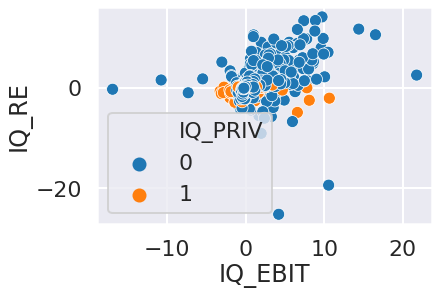

In [26]:
sns.scatterplot(x = 'IQ_EBIT', y = 'IQ_RE',hue = 'IQ_PRIV',data = X_train_scale)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.python.data import Dataset

In [28]:
dataset = Dataset.from_tensor_slices((X_train_scale.loc[:,'IQ_EBIT':'IQ_PUB'].values,y_train_scale.values))

In [29]:
dataset = dataset.map(lambda window1, window2: ( window1,window2))
#for (window ,window2 )in dataset:
#    print(window.numpy(), window2.numpy())
dataset = dataset.shuffle(buffer_size = 10)
#Batching the data with size 100
dataset = dataset.batch(20).prefetch(1)
#for x,y in dataset:
#   print(x.numpy(),y.numpy())
    


In [30]:
#Linear regression with Tensorflow
l0 = Dense(1,input_shape=[9]) 
model = Sequential([l0])

In [31]:
#Compilation of the model
model.compile(loss="mae",optimizer = SGD(lr=1e-3, momentum= 0.9))
history = model.fit(dataset, epochs = 200)

Epoch 1/200
372/372 [==============================] - 1s 3ms/step - loss: 0.2815ep - loss: 0.28
Epoch 2/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0731
Epoch 3/200
372/372 [==============================] - 0s 966us/step - loss: 0.0535
Epoch 4/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0509
Epoch 5/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0504
Epoch 6/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0504
Epoch 7/200
372/372 [==============================] - 0s 962us/step - loss: 0.0503
Epoch 8/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0503
Epoch 9/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0503
Epoch 10/200
372/372 [==============================] - 0s 988us/step - loss: 0.0504
Epoch 11/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0504
Epoch 12/200
372/372 [==============================] - 0s 1ms/step - loss:

372/372 [==============================] - 0s 997us/step - loss: 0.0504
Epoch 100/200
372/372 [==============================] - 0s 990us/step - loss: 0.0502
Epoch 101/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0504
Epoch 102/200
372/372 [==============================] - 1s 2ms/step - loss: 0.0503
Epoch 103/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0504
Epoch 104/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0502
Epoch 105/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0503
Epoch 106/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0504
Epoch 107/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0504
Epoch 108/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0502
Epoch 109/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0504
Epoch 110/200
372/372 [==============================] - 0s 974us/step - loss: 0.0504


372/372 [==============================] - 0s 808us/step - loss: 0.0503
Epoch 196/200
372/372 [==============================] - 0s 908us/step - loss: 0.0503
Epoch 197/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0503
Epoch 198/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0504
Epoch 199/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0506
Epoch 200/200
372/372 [==============================] - 0s 1ms/step - loss: 0.0504


In [32]:
print("layer weight {}", format(l0.get_weights()))

layer weight {} [array([[-1.6422664e-01],
       [-3.6146482e-03],
       [ 1.6240026e-01],
       [ 9.4082183e-01],
       [-2.7443290e-02],
       [-3.2027275e-04],
       [ 3.5844572e-02],
       [-4.9793031e-02],
       [-5.7553902e-02]], dtype=float32), array([0.03675548], dtype=float32)]


In [33]:
# Invert transform the forecast and test values
forecast = model.predict(X_test_scale.loc[:,'IQ_EBIT':'IQ_PUB'].values).flatten()
forecast = scaler_y.inverse_transform(forecast)
y_test_invert = scaler_y.inverse_transform(y_test_scale.values).flatten()
print(history.history.keys())

dict_keys(['loss'])


In [34]:
print(forecast)

[32.06118     4.310452   28.206326   ...  0.56244683 15.284103
 19.295944  ]


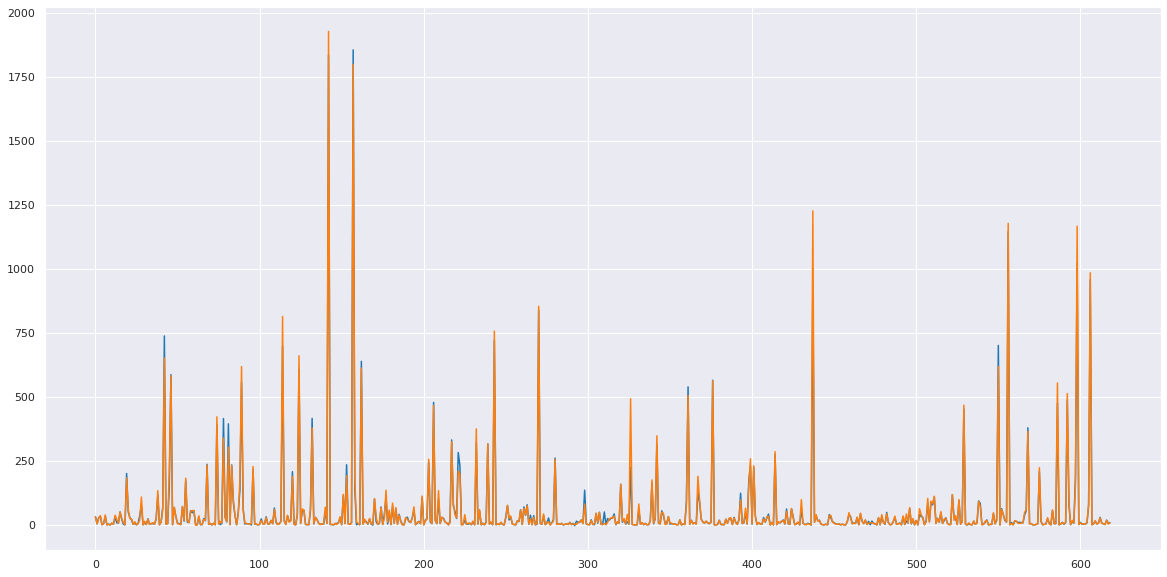

In [35]:
T = round(len(forecast)/3)
x = [i for i in range(T)]
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(x,forecast[0:T])
sns.lineplot(x,y_test_invert[0:T])

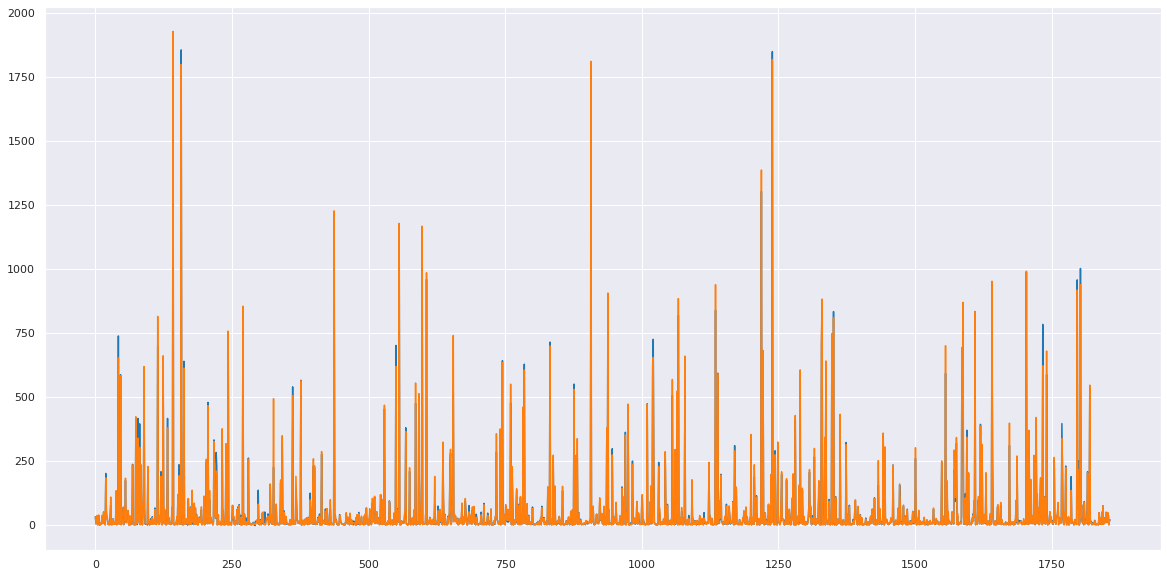

In [36]:
#T = round(len(forecast)/3)
x = [i for i in range(len(forecast))]
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(x,forecast)
sns.lineplot(x,y_test_invert)

In [52]:
train_mae = model.evaluate(X_train_scale.loc[:,"IQ_EBIT":"IQ_PUB"].values,y_train_scale.values,verbose = 0)

In [56]:
test_mae = model.evaluate(X_test_scale.loc[:,"IQ_EBIT":"IQ_PUB"].values,y_test_scale.values,verbose = 0)

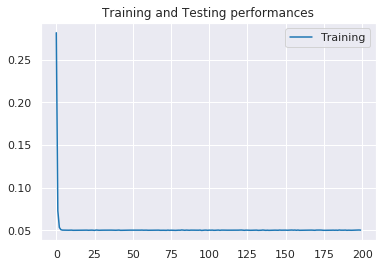

In [57]:
from matplotlib import pyplot
#Plot the loss during Training and Test
pyplot.title("Training and Testing performances")
pyplot.plot(history.history['loss'], label ="Training")
#pyplot.plot(history.history['val_loss'], label ="Testing")
pyplot.legend()
pyplot.show()

In [58]:
print("Train: %3f, Test: %3f", train_mae, test_mae)

Train: %3f, Test: %3f 0.050472685318004556 0.045919603500735776


In [59]:
tf.keras.metrics.mean_absolute_error(forecast,y_test_invert).numpy()

6.8481842870947665

In [42]:
tf.keras.metrics.mean_absolute_percentage_error(forecast,y_test_invert).numpy()

58.26751292071879

In [43]:
tf.keras.losses.mse(forecast,y_test_invert).numpy()

758.551866981477

In [68]:
def df_forecast(df,features_to_drop,features_to_add1,features_to_add2,df_to_add1, df_to_add2):
    df.drop(features_to_drop,axis = 1, inplace = True)
    df[features_to_add1] = df_to_add1
    df[features_to_add2] = df_to_add2
    return df


In [69]:
def error_data(df,errors,true_values,forecast):
    df[errors] = df.loc[:,true_values] - df.loc[:,forecast]
    return df

In [70]:
df_X_test_copy = X_test_scale.copy(deep = True)

In [71]:
df_X_test_copy = df_forecast(df_X_test_copy,features ,'IQ_TOTAL_REV_NEXT','FORECAST',y_test_invert, forecast)

In [72]:
df_X_test_copy = error_data(df_X_test_copy,'ERRORS','IQ_TOTAL_REV_NEXT','FORECAST')

In [73]:
df_X_test_copy.describe()

,year,IQ_PRIV,IQ_PUB,IQ_TOTAL_REV_NEXT,FORECAST,ERRORS
count,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000,1858.000000
mean,2012.226588,0.326157,0.673843,56.837075,53.540009,3.297104
std,3.843156,0.468932,0.468932,162.673598,152.082916,27.351117
min,1990.000000,0.000000,0.000000,-1.387500,-2.593643,-161.680662
25%,2010.000000,0.000000,0.000000,2.637807,2.608887,-1.012892
50%,2013.000000,0.000000,1.000000,8.482414,8.631989,0.069753
75%,2015.000000,1.000000,1.000000,29.208009,28.925200,1.519929
max,2017.000000,1.000000,1.000000,1926.288100,1854.111084,704.741490


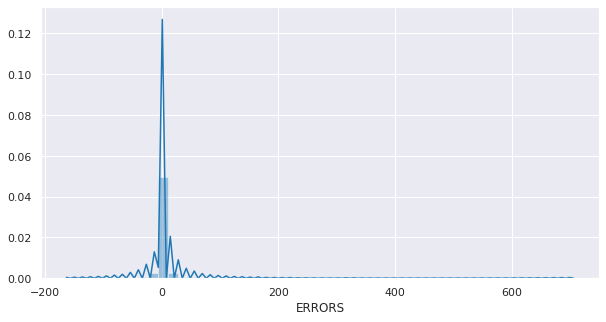

In [74]:
plt.figure(figsize=(10,5))
sns.distplot(df_X_test_copy['ERRORS'])

In [ ]:
# Let's add new layers so to have a DNN model with 2 layers

In [75]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[9], activation = 'relu'),
    
#tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
    
])

In [76]:
#Compilation of the 
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 50))
optimizer = SGD(lr=1e-3,momentum = 0.9)
dnn_model.compile(loss="mae",optimizer = optimizer)
history = dnn_model.fit(dataset,epochs = 50, callbacks = [lr_schedule])

Epoch 1/50
372/372 [==============================] - 1s 3ms/step - loss: 0.1923
Epoch 2/50
372/372 [==============================] - 0s 1ms/step - loss: 0.1032
Epoch 3/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0773
Epoch 4/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0669
Epoch 5/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0610
Epoch 6/50
372/372 [==============================] - 1s 1ms/step - loss: 0.0581
Epoch 7/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0574
Epoch 8/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0559
Epoch 9/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0557
Epoch 10/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0550
Epoch 11/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0549
Epoch 12/50
372/372 [==============================] - 0s 1ms/step - loss: 0.0545
Epoch 13/50
372/372 [====

[0.001, 1, 0, 5]

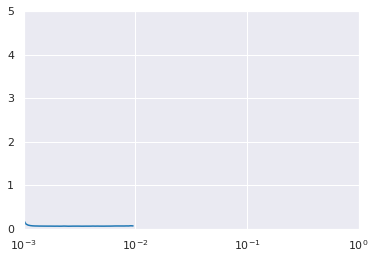

In [77]:
lrs = 1e-3*(10**(np.arange(50)/50))
plt.semilogx(lrs,history.history["loss"])
plt.axis([1e-3,1,0,5])

In [78]:
#Compilation of the model
dnn_model.compile(loss="mae",optimizer = SGD(lr=0.01,momentum = 0.9))
history = dnn_model.fit(dataset,epochs = 30)

Epoch 1/30
372/372 [==============================] - 2s 4ms/step - loss: 0.0609
Epoch 2/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0580
Epoch 3/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0613
Epoch 4/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0615
Epoch 5/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0597
Epoch 6/30
372/372 [==============================] - 0s 917us/step - loss: 0.0617
Epoch 7/30
372/372 [==============================] - 0s 912us/step - loss: 0.0614
Epoch 8/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0611
Epoch 9/30
372/372 [==============================] - 0s 989us/step - loss: 0.0604
Epoch 10/30
372/372 [==============================] - 0s 905us/step - loss: 0.0570
Epoch 11/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0602
Epoch 12/30
372/372 [==============================] - 0s 965us/step - loss: 0.0590
Epoch 13/30
372

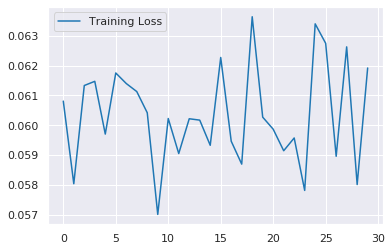

In [79]:
#print("layer weight {}", format(dnn_model.get_weights()))
loss = history.history['loss']
epochs = range(len(loss))
sns.lineplot(epochs, loss,label = 'Training Loss')

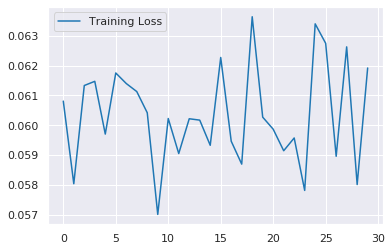

In [80]:
loss = history.history['loss']
epochs =[i for i in range(30)]
sns.lineplot(epochs, loss[0:200],label = 'Training Loss')

In [81]:
forecast = dnn_model.predict(X_test_scale.loc[:,'IQ_EBIT':'IQ_PUB'].values).flatten()
forecast = scaler_y.inverse_transform(forecast)

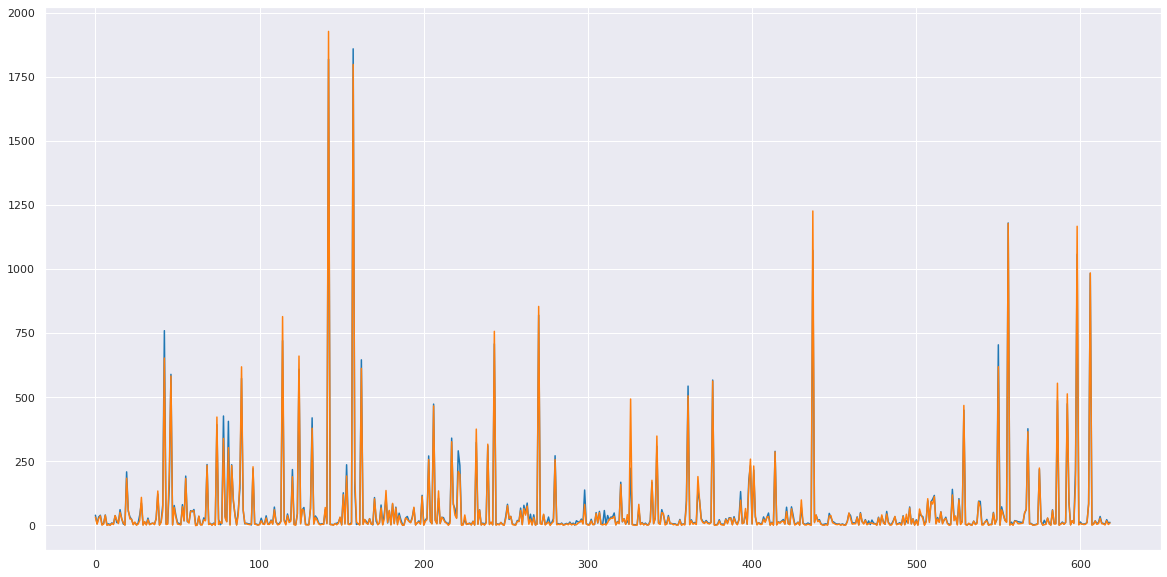

In [82]:
T = round(len(forecast)/3)
x = [i for i in range(T)]
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(x,forecast[0:T])
sns.lineplot(x,y_test_invert[0:T])

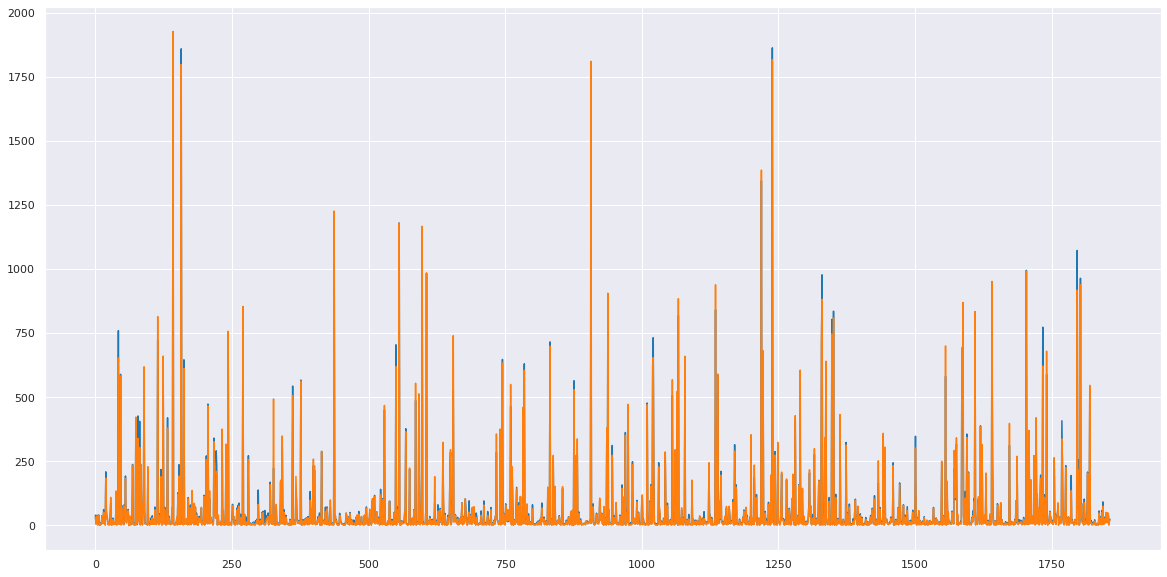

In [83]:
x = [i for i in range(len(forecast))]
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(x,forecast)
sns.lineplot(x,y_test_invert)

In [84]:
tf.keras.metrics.mean_absolute_error(forecast,y_test_invert).numpy()

8.053252950893325

In [85]:
tf.keras.metrics.mean_absolute_percentage_error(forecast,y_test_invert).numpy()

35.829068842589635

In [86]:
mse = tf.keras.losses.mse(forecast,y_test_invert).numpy()
mse

713.4175511178345

In [87]:
RMSE  = np.sqrt(mse)
RMSE

26.709877407390593

In [88]:
def forecast_company(df,df1,company_id,year,quarter):
    idx =  df.loc[(df['company']== company_id)&(df['year']== year)&(df['quarter']== quarter)].index.tolist()[0]
    print(idx)
    return df1[idx],df1.index.get_loc(idx)

In [89]:
X_test_scale.head()

,company,year,quarter,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_PRIV,IQ_PUB
0,IQ760034,2013.0,Q4,0.022667,-0.241840,0.022667,-0.148570,-0.106682,0.765037,0.090152,0,1
1,IQ1028801,2014.0,Q4,-0.202024,-0.297143,-0.202024,-0.339870,-0.291468,-0.115635,-0.246382,0,1
2,IQ137792,2011.0,Q4,-0.022982,-0.162106,-0.022982,-0.170251,-0.175994,-0.052158,-0.116557,0,1
3,IQ7658114,2016.0,Q4,-0.020562,-0.229361,-0.020562,-0.124377,0.197810,0.093509,-0.080443,0,1
4,IQ9283859,2016.0,Q4,-0.228329,-0.360009,-0.228329,-0.365785,-0.317983,-0.131940,-0.264007,0,1


In [90]:
df_X_test_copy = X_test_scale.copy(deep = True)

In [92]:
df_X_test_copy = df_forecast(df_X_test_copy,features ,'IQ_TOTAL_REV_NEXT','FORECAST',y_test_invert, forecast)

In [93]:
df_X_test_copy = error_data(df_X_test_copy, 'ERRORS','IQ_TOTAL_REV_NEXT','FORECAST')

In [94]:
df_X_test_copy.head()

,company,year,quarter,IQ_PRIV,IQ_PUB,IQ_TOTAL_REV_NEXT,FORECAST,ERRORS
0,IQ760034,2013.0,Q4,0,1,31.397160,39.182663,-7.785503
1,IQ1028801,2014.0,Q4,0,1,4.327500,6.476586,-2.149086
2,IQ137792,2011.0,Q4,0,1,26.166681,32.470440,-6.303759
3,IQ7658114,2016.0,Q4,0,1,36.362633,39.116573,-2.753940
4,IQ9283859,2016.0,Q4,0,1,0.847081,2.469658,-1.622577


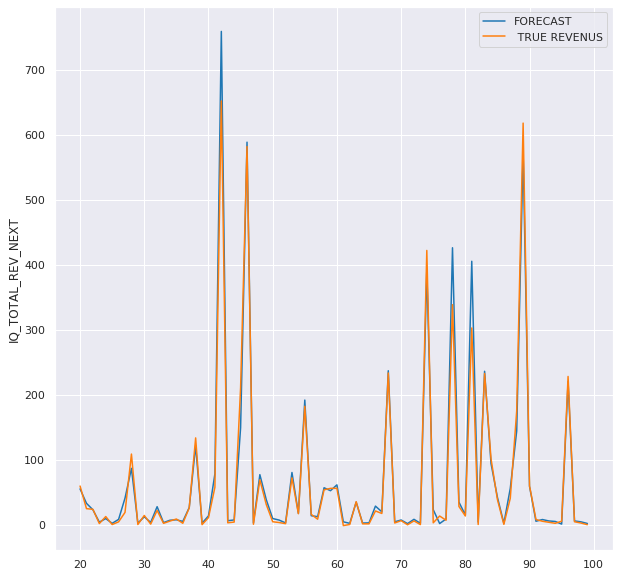

In [95]:
plt.figure(figsize=(10,10))
#idx = df_X_test_copy.index.get_loc(42)
sns.lineplot(x = range(20,100), y = 'FORECAST', data = df_X_test_copy[20:100],label ='FORECAST')
sns.lineplot(x = range(20,100), y = 'IQ_TOTAL_REV_NEXT', data = df_X_test_copy[20:100],label =' TRUE REVENUS')

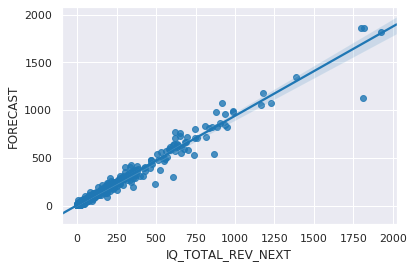

In [96]:
# Strong correlation between the revenue and the forecast
sns.regplot(x = 'IQ_TOTAL_REV_NEXT', y = 'FORECAST', data = df_X_test_copy)

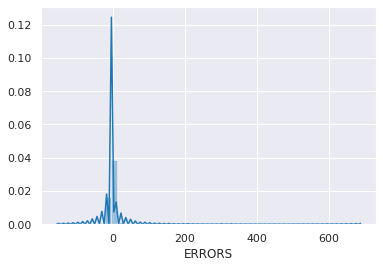

In [97]:
sns.distplot(df_X_test_copy['ERRORS'])

In [98]:
#Compilation of the 
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 30))
optimizer = SGD(lr=1e-3,momentum = 0.9)
dnn_model.compile(loss=tf.keras.losses.Huber(0.3),optimizer = optimizer)
history = dnn_model.fit(dataset,epochs = 30, callbacks = [lr_schedule])

Epoch 1/30
372/372 [==============================] - 1s 4ms/step - loss: 0.0071
Epoch 2/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 3/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 4/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 5/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 6/30
372/372 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 7/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 8/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 9/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 10/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 11/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 12/30
372/372 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 13/30
372/372 [====

In [99]:
forecast_huber = dnn_model.predict(X_test_scale.loc[:,'IQ_EBIT':'IQ_PUB'].values).flatten()
forecast_huber = scaler_y.inverse_transform(forecast_huber)

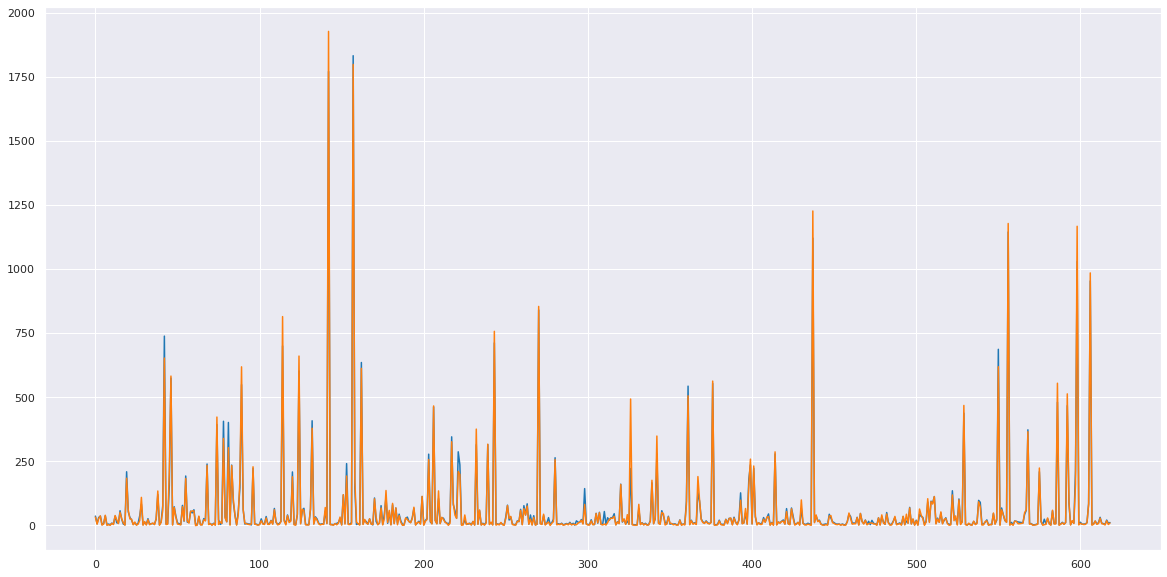

In [100]:
T = round(len(forecast)/3)
x = [i for i in range(T)]
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(x,forecast_huber[0:T])
sns.lineplot(x,y_test_invert[0:T])

In [101]:
print(tf.keras.metrics.mean_absolute_error(forecast_huber,y_test_invert).numpy())
print(tf.keras.metrics.mean_absolute_percentage_error(forecast_huber,y_test_invert).numpy())
print(tf.keras.losses.mse(forecast_huber,y_test_invert).numpy())

7.564951728995652
33.28310672453712
761.800549172518


In [102]:
df_X_test_copy

,company,year,quarter,IQ_PRIV,IQ_PUB,IQ_TOTAL_REV_NEXT,FORECAST,ERRORS
0,IQ760034,2013.0,Q4,0,1,31.397160,39.182663,-7.785503
1,IQ1028801,2014.0,Q4,0,1,4.327500,6.476586,-2.149086
2,IQ137792,2011.0,Q4,0,1,26.166681,32.470440,-6.303759
3,IQ7658114,2016.0,Q4,0,1,36.362633,39.116573,-2.753940
4,IQ9283859,2016.0,Q4,0,1,0.847081,2.469658,-1.622577
...,...,...,...,...,...,...,...,...
1853,IQ5647569,2015.0,Q4,0,1,48.659810,43.118683,5.541127
1854,IQ224927927,2016.0,Q4,0,1,37.857000,42.054405,-4.197405
1855,IQ61679890,2016.0,Q4,0,1,0.393556,2.862332,-2.468776
1856,IQ531375,2010.0,Q4,0,1,17.039635,17.361546,-0.321911
